# Introduction to Data Science
## Homework 3 - Implementing a Decision Tree in ScikitLearn and analysing it.

Student Name: Titash Mandal

Student Netid: tm2761
***

### Part 1
Assume that $X$ and $Y$ are discrete random variables. The formulas for Mutual Information, Entropy and Conditional Entropy are given by:

$$\text{Mutual Information} = \sum_{y \in Y} \sum_{x \in X} p(x, y) \cdot log\frac{p(x, y)}{p(x)p(y)}$$

$$\text{Entropy} = H(Y) = -\sum_{y \in Y} p(y) \cdot log(p(y))$$

$$\text{Conditional Entropy} = H(Y \mid X) = \sum_{x \in X} p(x) \cdot H(Y \mid X = x)$$

Show mathematically that $\text{Mutual Information} = \text{Information Gain}$, where $\text{Information Gain} = H(Y) – H(Y \mid X)$. Give the derivation below (note, this can be done using Latek math notation, which renders nicely. See above. Feel free to do it by hand and submit an image of your proof).

Place your answer here!


### Part 2 - Preparing a Training Set and Training a Decision Tree
This is a hands-on task where we build a predictive model using Decision Trees discussed in class. For this part, we will be using the data in `cell2cell_data.csv`.

These historical data consist of 39,859 customers: 19,901 customers that churned (i.e., left the company) and 19,958 that did not churn (see the `"churndep"` variable). Here are the data set's 11 possible predictor variables for churning behavior: 

```
Pos.  Var. Name  Var. Description
----- ---------- --------------------------------------------------------------
1     revenue    Mean monthly revenue in dollars
2     outcalls   Mean number of outbound voice calls
3     incalls    Mean number of inbound voice calls
4     months     Months in Service
5     eqpdays    Number of days the customer has had his/her current equipment
6     webcap     Handset is web capable
7     marryyes   Married (1=Yes; 0=No)
8     travel     Has traveled to non-US country (1=Yes; 0=No)
9     pcown      Owns a personal computer (1=Yes; 0=No)
10    creditcd   Possesses a credit card (1=Yes; 0=No)
11    retcalls   Number of calls previously made to retention team
```

The 12th column, the target variable `"churndep"`, equals 1 if the customer churned, and 0 otherwise. 

1\. Load the data and prepare it for modeling. Note that the features are already processed for you, so the only thing needed here is split the data into training and testing. Use pandas to create two data frames: train_df and test_df, where train_df has 80% of the data chosen uniformly at random without replacement (test_df should have the other 20%). Also, make sure to write your own code to do the splits. You may use any random() function numpy but DO NOT use the data splitting functions from Sklearn.

In [6]:
import pandas as pd
import numpy as np
#The csv file is in the same directory as the notebook.
entire_dataFrame=pd.read_csv('cell2cell_data.csv')
entire_dataFrame.columns = ['revenue', 'outcalls','incalls','months','eqpdays','webcap','marryyes','travel','pcown','creditcd','retcalls','churndep']


<h1>Method-1</h1>
<p> Using sample function to split the dataset into training and testing dataset</p>

In [8]:
#sample function returns a random sample of items from an axis of object.
train_df=entire_dataFrame.sample(frac=0.8)
test_df=entire_dataFrame.drop(train_df.index)


       revenue  outcalls  incalls  months  eqpdays  webcap  marryyes  travel  \
3605     60.43     22.00     3.33      26      803       1         0       0   
4848    137.25      6.00     2.33      13      397       1         0       0   
17327    35.47      0.00     0.00      14      169       1         1       0   
18865    88.59     55.67    44.33      29      170       1         0       0   
39828   237.33    305.00   176.33      31       13       1         0       0   
35585    77.92     49.00    15.67      13       68       1         0       0   
4135     53.70     15.00    17.00      28      641       0         0       0   
21657    34.99     40.33     2.67      26      782       1         0       0   
21477    34.11      0.00     0.00      32      966       1         1       0   
21938    42.31     72.67    25.00      28      221       1         0       0   
5419     49.61     10.33     5.67      28      629       1         0       0   
25645    61.94      0.00     0.00      1

<h1>Method-2</h1>
<p> Using random function to split the dataset. This was done just to see the difference in the output of the two cases and using which method gives better accuracy. As it gave almost similar results, I used the train_df and test_df from above in the entire assignment</p>

In [3]:
TRAIN_SIZE = 0.80
# Create boolean mask
# np.random creates a vector of random values between 0 and 1
# Those values are filtered to create a binary mask
msk = np.random.rand(len(entire_dataFrame)) < TRAIN_SIZE

train_df_Option2 = entire_dataFrame[msk]  
test_df_Option2 = entire_dataFrame[~msk]



2\. If we had to, how would we prove to ourselves or a colleague that our data was indeed randomly sampled on X? And by prove, I mean empirically, not just showing this person our code. Don't actually do the work, just describe in your own words a test you could here. Hint: think about this in terms of selection bias and use notes from our 2nd lecture.

<h3>Answer</h3>
<p>Distributing the dataframe into training set and test set using the <b>random()</b> function or the <b>sample()</b> function randomly distributes the data points instead of being biased towards any attributes. Every analysis starts by drawing a data sample S from a
population D. In our case we want to draw two Samples S_training, S_test from the population D.
        Each instance is characterized by a set of features (revenue, outcalls,travels etc)
        If being in the sample S_training, S_test is independent on any of those features, the sample is unbiased.
As we have randomly selected the data points, they are free from biases and hence are indeed randomly sampled.</p>
<br>We can also run a test to see whether the rate of churn in training data is the same as the rate of churn in the whole dataset, and the the rate of churn in testing data is the same as the rate of churn in the whole dataset. That is, P(churn/training)=P(churn) and P(churn/testing)=P(churn). (This means there is no selection bias. Being in the training set or testing set is independent of being churn or not.)</br>


3\. Now build and train a decision tree classifier using `DecisionTreeClassifier()` [(manual page)](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) on train_df to predict the `"churndep"` target variable. Make sure to use `criterion='entropy'` when instantiating an instance of `DecisionTreeClassifier()`. For all other settings you should use all of the default options.

In [12]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
# Create decision tree classifer object using entropy
#the usage of defining random_state is to make sure the splitted dataset is the same even if we split the dataset again and again. 
#It is actually only used to make sure we can reproduce the exact same dataset again.
clf = DecisionTreeClassifier(criterion='entropy',random_state=0)
#We have to divide the train_df into target variable and other attributes
attributes_train_df=train_df[train_df.columns[:11]]
target_train_df=train_df[train_df.columns[-1]]
clf= clf.fit(attributes_train_df, target_train_df)
#Returns the feature importances.
importances = clf.feature_importances_

attributes_train_df.shape


(31886, 11)

4\. Using the resulting model from 2.2, show a bar plot of feature names and their feature importance (hint: check the attributes of the `DecisionTreeClassifier()` object directly in IPython or check the manual!).

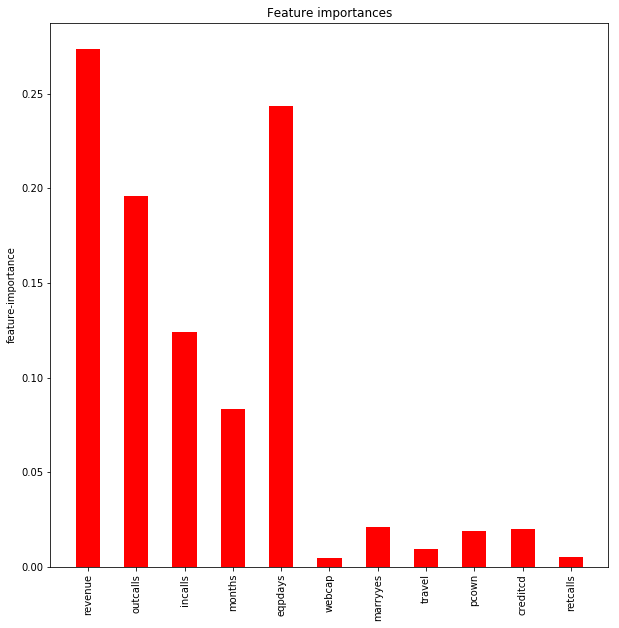

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,10))
# Plot the feature importances of the forest
#set the title of the plot
plt.title("Feature importances")
#plot the bar plot
plt.bar(range(attributes_train_df.shape[1]), importances,color="r", align="center",width=0.5)
plt.xticks(np.arange(len(importances)),entire_dataFrame.columns,rotation='vertical')
plt.ylabel("feature-importance")
plt.show()


5\. Is the relationship between the top 3 most important features (as measured here) negative or positive? If your marketing director asked you to explain the top 3 drivers of churn, how would you interpret the relationship between these 3 features and the churn outcome?  What "real-life" connection can you draw between each variable and churn?

In [6]:
# Code/answer here
#The top three important features is revenue, outcalls, eqpdays.
#correlation helps us calculate the relationship between the attributes of the dataset.
#correlation matrix, is used to investigate the dependence between multiple variables at the same time
correlation = entire_dataFrame[['revenue','outcalls','eqpdays']].corr()
#Each element on the principal diagonal of a correlation matrix is the correlation of a random variable with itself, which always equals 1. 
#Each off-diagonal element is between 1 and –1 inclusive.
correlation



,revenue,outcalls,eqpdays
revenue,1.000000,0.500869,-0.221956
outcalls,0.500869,1.000000,-0.243991
eqpdays,-0.221956,-0.243991,1.000000


In [7]:
correlation_abs = entire_dataFrame[['revenue','outcalls','eqpdays']].corr().abs()
correlation_abs


,revenue,outcalls,eqpdays
revenue,1.000000,0.500869,0.221956
outcalls,0.500869,1.000000,0.243991
eqpdays,0.221956,0.243991,1.000000


<h1> Relationship between the 3 most important features to predict churn. </h1>
<h3>The sign of the correlation tells us whether the two variables are positively or negatively related. The absolute value tells us how strong the relationship is.</h3>
<p> We can see that feature <font color='red'><b>revenue</b></font> is <font color='blue'>positively correlated</font> with the feature <font color='red'><b>outcalls</b></font> but <font color='blue'>negatively correlated</font> with the feature <font color='red'>eqpdays</font>. Thus when the outcalls is more(positive), the revenue will be more and when it is less , the revenue will be less.<p>
<p> Thus, <font color='red'><b>eqp days</b></font> is <font color='blue'>negatively correlated</font> with <font color='red'>outcalls and revenue</font>. If the eqpdays increases , both outcalls and revenue will decrease and vice-versa.</p>

In [8]:
#Relationship between the three important features and churndep
correlation_churndep = entire_dataFrame[['revenue','outcalls','eqpdays','churndep']].corr()
correlation_churndep

,revenue,outcalls,eqpdays,churndep
revenue,1.000000,0.500869,-0.221956,-0.013561
outcalls,0.500869,1.000000,-0.243991,-0.037223
eqpdays,-0.221956,-0.243991,1.000000,0.112698
churndep,-0.013561,-0.037223,0.112698,1.000000


<h1> Relationship between the 3 most important features and churndep. </h1>
<p>The <font color='red'><b> churndep</b></font> is positively correlated with <font color='red'>eqpdays</font>, but it is negatively correlated with <font color='red'><b>revenue</b></font> and <font color='red'><b>outcalls</b></font>.</p>
<font color='blue'><p> If the revenue of the company will be low, there will be high churning of customers as people are bound to leave a company which isn't making much money. If customers come to know that the company isn't making high profits, trust with the brand usually decreases. Also, if the customers are having a lower mean average income, they will not be able to afford the subscription fees and will churn.<p></font>
<font color='green'><p>Also, if the company is making a low number of outbound calls it may be that customers are not receiving adequate customer service from the company. They may not be receiving follow up calls or assistance with respect to their equipment. Hence they leave. Thus this negative relationship is quite plausible in real life.</p></font>
<font color='blue'><p>On the other hand if customers are having one equipment with them for a long time, it may be that they are looking for a new equipment, they are looking to invest in newer technology, better products and a change and their churn rate will be higher.
</p></font>

6\. Using the classifier built in 2.3, try predicting `"churndep"` on both the train_df and test_df data sets. What is the accuracy on each? If they are different, can you explain the difference?

In [25]:
# Code here
from sklearn.metrics import accuracy_score

train_data=train_df.drop('churndep',axis=1)
test_data=test_df.drop('churndep',axis=1)

prediction_train_df=clf.predict(train_data)
prediction_test_df=clf.predict(test_data)

accuracyTrain=accuracy_score(prediction_train_df,train_df['churndep'])
print("Accuracy from the training data set prediction is",accuracyTrain*100,"%")

Accuracy from the training data set prediction is 99.9843191369 %


In [10]:
accuracyTest=accuracy_score(prediction_test_df,test_df['churndep'])
print("Accuracy from the test data set prediction is",accuracyTest*100,"%")


Accuracy from the test data set prediction is 53.8760662318 %


<h1> Difference in accuracy between test data set and train data set:</h1>
<p>The ultimate goal of decision tree-based models is to split the tree such that each leaf node corresponds to the prediction of a single class, even if there is only one sample in that class. However, this can lead to the tree radically overfitting the data. This is an example of overfitting. <b>Overfitting happens when the decision tree continues to grow and reduces the training set error, but at the expense of the test set error.</b> </p>

### Part 3 - Finding a Good Decision Tree
The default options for your decision tree may not be optimal. We need to analyze whether tuning the parameters can improve the accuracy of the classifier.  For the following options `min_samples_split` and `min_samples_leaf`:

1\. Generate a list of 10 values of each for the parameters min_samples_split and min_samples_leaf. 

In [11]:
#Leaf is the end node of a decision tree. A smaller leaf makes the model more prone to capturing noise in train data.
#min_samples_split is the minimum number of samples required to split an internal node.
#min_samples_leaf is the minimum number of samples required to be in a leaf node.
import random
min_samples_split_values = []
min_samples_leaf=[]
for i in range(10):
    min_samples_split_values.append(random.randint(500,1000))
    min_samples_leaf.append(random.randint(50,100))
#min_samples_split_values.sort()
#min_samples_leaf.sort()
print(min_samples_split_values,min_samples_leaf)

[560, 583, 800, 942, 508, 617, 678, 833, 552, 998] [77, 78, 73, 71, 72, 76, 60, 62, 81, 94]


2\. Explain in words your reasoning for choosing the above ranges.

<h2> Reason for choosing such ranges: </h2>
<p> We need to have a certain number of samples in the dataset to allow a split to occur. This is given by <font color='red'>min_samples_split</font>. After the split occurs, we need to have a certain number of samples in a leaf node. If the leaf has lesser samples, we can reject the split. This is given by  <font color='red'>min_samples_leaf</font>.</p> 
<p>Thus we need the range of the <font color='red'>min_samples_split</font> to be greater than the range of the <font color='red'>min_samples_leaf</font>. To prevent overfitting in the decision tree, I have chosen a larger value for the min_samples_leaf.
<h3>Thus:</h3>
<br><b>(n_node_samples < 2 * min_samples_leaf)</b><br>
<br><b>(n_node_samples < min_samples_split)</b></br></p>

3\. For each combination of values in 3.1 (there should be 100), build a new classifier and check the classifier's accuracy on the test data. Plot the test set accuracy for these options. Use the values of `min_samples_split` as the x-axis and generate a new series (line) for each of `min_samples_leaf`.

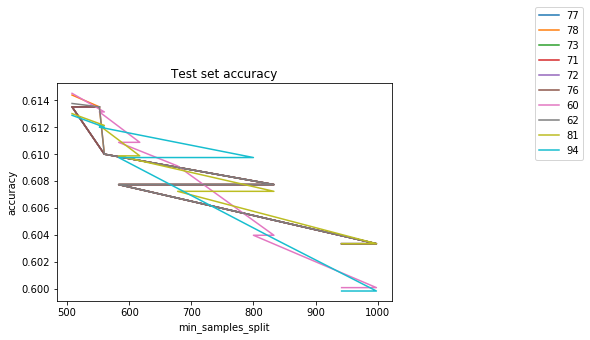

Thus the maximum accuracy is 61.4525840442 for the min_samples_split value 508 and min_samples_leaf 60


In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
def newClassifier(min_leaf,min_split):
    clf=DecisionTreeClassifier(criterion='entropy',min_samples_leaf=min_leaf,min_samples_split=min_split)
    clf= clf.fit(test_df[['revenue', 'outcalls','incalls','months','eqpdays','webcap','marryyes','travel','pcown','creditcd','retcalls']], test_df['churndep'])
    prediction=clf.predict(test_data)
    accuracy=accuracy_score(prediction,test_df['churndep'])
    return accuracy

#plt.subplots() is a function that returns a tuple containing a figure and axes object(s). 
#Thus when using fig, ax = plt.subplots() you unpack this tuple into the variables fig and ax. 
ax=plt.subplots()
plt.title('Test set accuracy')
accuracy=[]
min_samples_splits=[]
dictionary={}

#For each split_size of the leaf, let there be 10 split_sizes for the min_sample size

for i in range(10):
    for j in range(10):
        individual_accuracy=newClassifier(min_samples_leaf[i],min_samples_split_values[j])
        #cast the values into a tuple and add them to the accuracy which is a list
        accuracy.append((individual_accuracy,min_samples_split_values[j],min_samples_leaf[i]))
        dictionary[min_samples_split_values[j]]=individual_accuracy
    result_list=[(v, k) for k, v in dictionary.items()]
    result_list=sorted(result_list)
    splts,acc=zip(*result_list)
    plt.plot(acc,splts,label=min_samples_leaf[i])
    plt.ylabel('accuracy')
    plt.xlabel('min_samples_split')

plt.legend(bbox_to_anchor=(1.5, 1),loc = 10)
plt.show()

        
tuples=max(accuracy)
print("Thus the maximum accuracy is",tuples[0]*100, "for the min_samples_split value",tuples[1],"and min_samples_leaf",tuples[2])

        

4\. Which configuration returns the best accuracy? What is this accuracy? (Note, if you don't see much variation in the test set accuracy across values of min_samples_split or min_samples_leaf, try redoing the above steps with a different range of values).

In [21]:
# Code here
print("Thus the maximum accuracy is",tuples[0]*100, "for the min_samples_split value",tuples[1],"and min_samples_leaf",tuples[2])


Thus the maximum accuracy is 61.4400401405 for the min_samples_split value 542 and min_samples_leaf 53


<h2> References from the internet are:</h2>
<p>https://blog.nelsonliu.me/2016/08/05/gsoc-week-10-scikit-learn-pr-6954-adding-pre-pruning-to-decisiontrees/<p>
<p>stackoverflow.com<p>
<p>https://blog.kissmetrics.com/modeling-churn/<p>


5\. If you were working for a marketing department, how would you use your churn production model in a real business environment? Explain why churn prediction might be good for the business and how one might improve churn by using this model.

<h3>Churn Prediction Model:</h3>
<p>Churn prediction consists of detecting which customers are likely to cancel a subscription to a service based on how they use the service. Using this model we figured out that eqpdays, revenue and outcalls are the three most important features causing customer churn. Once we know these factors, as a marketing person we may work on methods to improve these services for the company to prevent churn.</p>
<font color='blue'><p>The primary driver of churn is <b>Revenue</b>. I will try to focus on building some business strategy to impact both  higher mean income families and lower mean income families. Example: Joining coupons, seasonal discounts, student offers, family-plan offers can make many customers enroll for the program. </p></font>
<font color='red'><p>The second driver of churn is <bold>"eqpdays"</bold>.Providing customers with better calling support, better customer service and feedback mechanism could be some ways.</p>
<font color='green'><p>Finally, "eqpdays" is also a prime cause of churn.Thus changing the equipments they use after a certain period of time by providing exciting exchange offers, providing them with better technology equipment can be some changes we can bring to the company after using this model to predict customer churn. It is always important to focus on market research to see what the competitor industry is doing and to find ways to establish and edge over them.
</p></font>
